#FETAL HEALTH

#Introducción

Con esta base de datos se pretende facilitar la evaluación de feto, permitiendo así que los profesionales sean capaces de tomar las decisiones adecuadas para la salud del feto y de la madre.

El atributo mas importante que se tendrá en cuenta será fetal_health que contiene la classificación segun expertos



#inicio

Primero de todo implementamos todos los includes.

In [7]:
import numpy as np
import pandas as pd
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset


In [10]:
dataset = load_dataset('fetal_health.csv')
dataset.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Una vez cargamos los datos compruebo los 5 primeros valores para comprobar que se haya cargado.
Con esta primera información podemos ver que existen 22 columnas de atributos y algunas columnas tienen valores iguales a 0, por ahora no se puede determinar si seràn una molestia o no.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Con el dataset.info() podemos ver que la base de datos consta de 2126 entradas.
Si miramos la columna de non-Null vemos que no existen valores nulos en la base de datos y en la columna siguiente podemos ver que todos los atributos son del mismo tipo de variable (float64).

In [12]:
dataset.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Para asegurarme utilizo el isnull para hacer una segunda comprobación.

In [13]:
dataset.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Una vez hechado un vistazo al dataset comprobamos una primera idea de la distribución de los datos.
Podemos ver un posible desequilibrio de los datos, no obstante no podemos ver si estan normalizados o escalados, asi como la distribución de los datos, solo una aproximación.

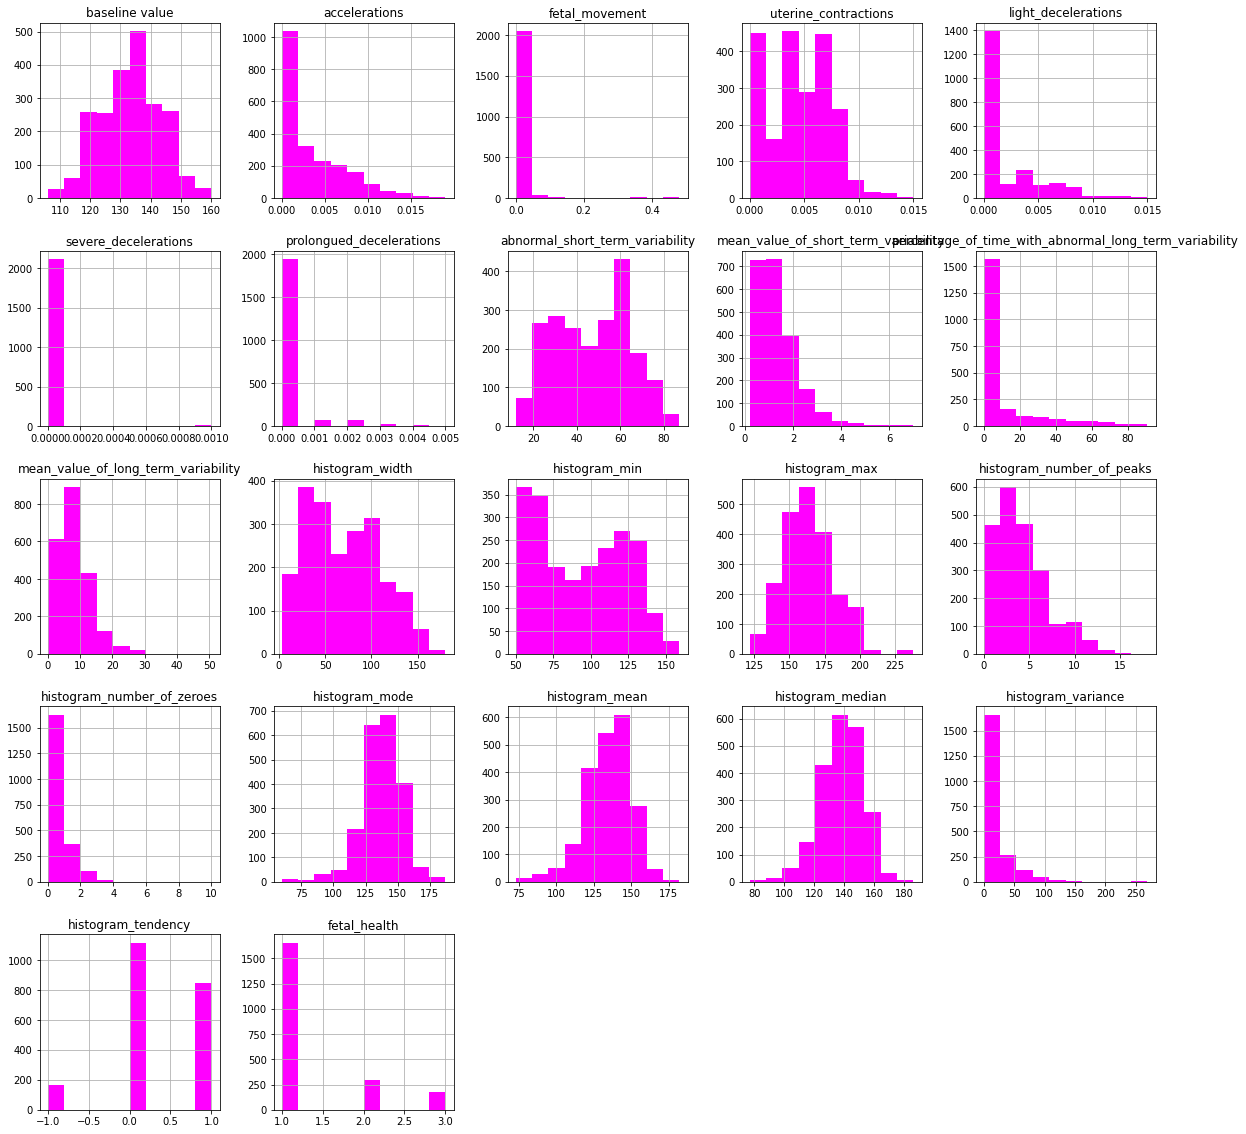

In [17]:
historama = dataset.hist(figsize = (20,20), color = "#FF00FF")

Gracias a estos gráficos podemos ver que la mayoria de atributos siguen una distribución normal a excepción de los atributos como light_decelerations.

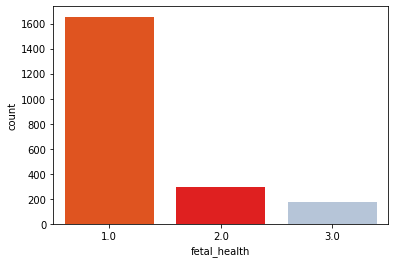

In [18]:
colours=["#FF4500","#FF0000", "#B0C4DE"]
sns.countplot(data= dataset, x="fetal_health",palette=colours)

Una vez realizado el gráfico podemos ver con más seguridad que los datos estan mal balanceados.
Esto puede provocar que si realizamos un estudio de accuracy no obtengamos un resultado correcto.

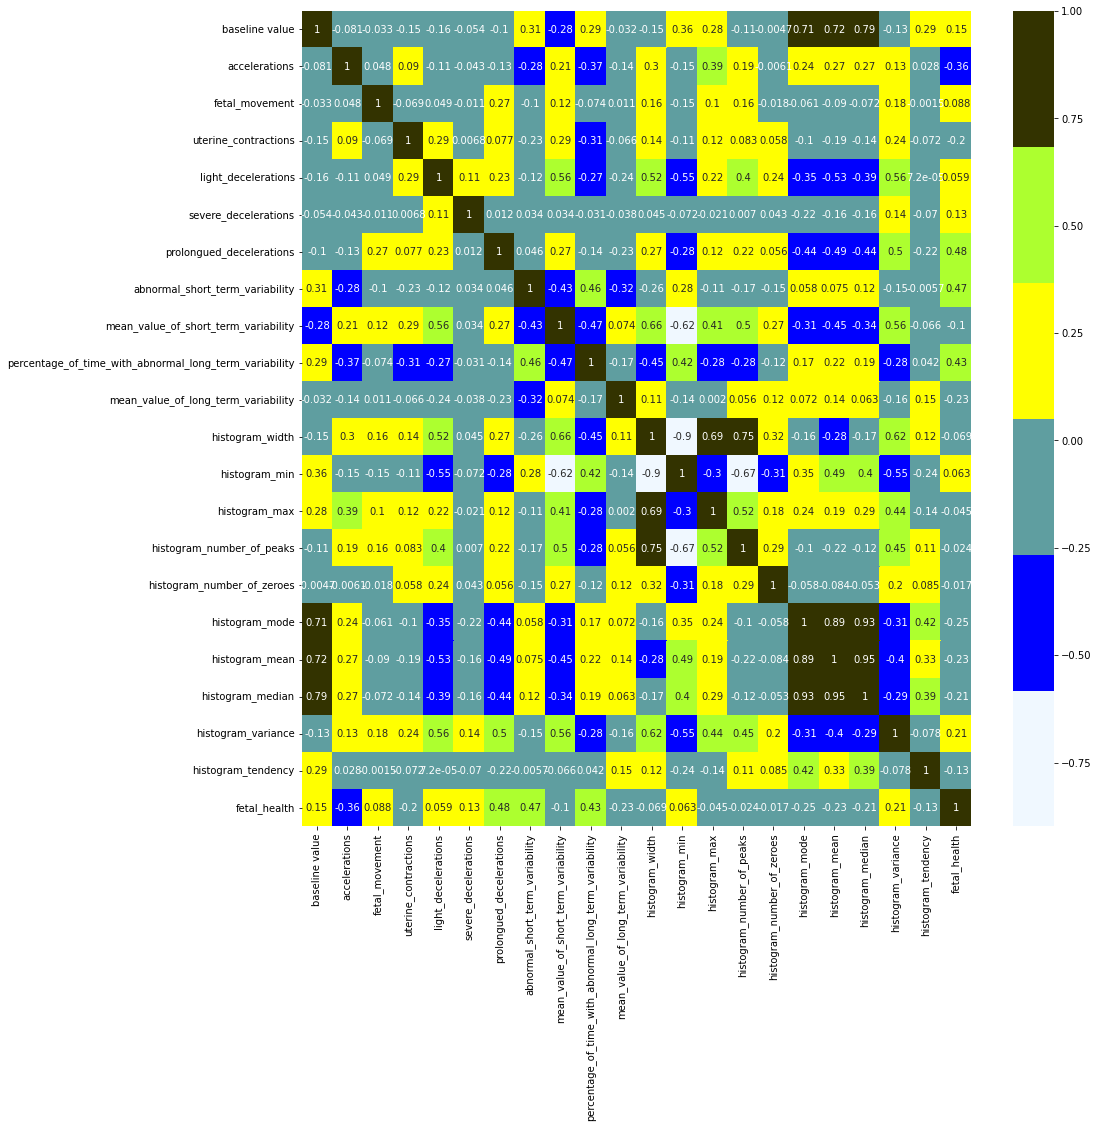

In [20]:
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
colores = (["#F0F8FF", "#0000FF", "#5F9EA0", "#FFFF00", "#ADFF2F", "#333300"])

correlacion= dataset.corr()

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlacion,cmap=colores,annot=True)
plt.show()

podemos observar que hay una alta corelación con "histogram_mode", "histogram_mean" y "histogram median" entre ello y con algunos de los otros atributos.

Si se observa la matriz de corelación podemos ver que los atributos "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" y "mean_value_of_long_term_variability" son los que tienen mas corelación, correspondiente al color amarillo.
Tambien podemos ver que atributos tales como "histogram_number_of_zeroes", "histogram_number_of_peaks", "histogram_max" y "histogram_width" una corelación muy baja y por lo tanto no les prestaremos atención.


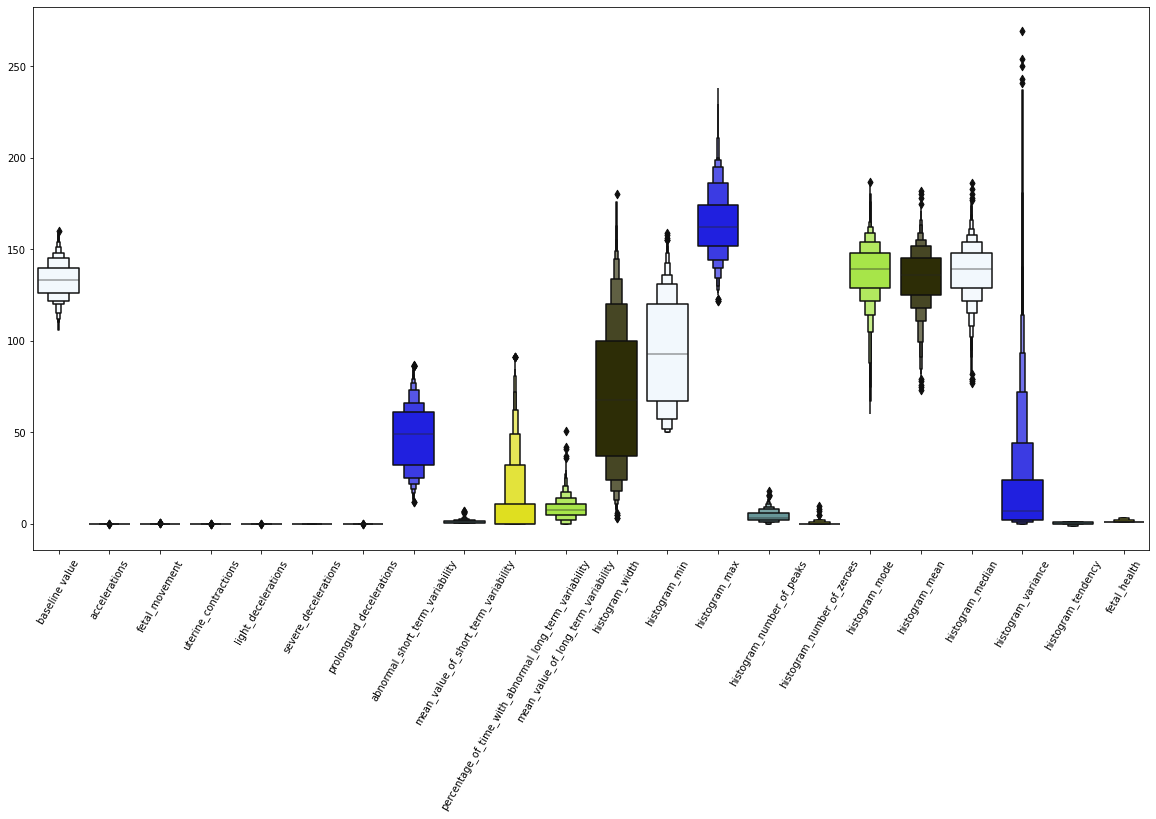

In [22]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = dataset,palette = colores)
plt.xticks(rotation=60)
plt.show()

En este gráfico podemos ver los rangos en los que se encuentran cada atributo.
Tal y como se dijo antes los valores estan muy dispersos y por lo tanto podemos ver que los rangos de los atributos son muy diferentes.
De este modo se puede ver que hay que tratar los datos antes de hacer nada mas.
Para ello  escalaré los datos.

In [30]:
dataset_X=dataset.drop(["fetal_health"],axis=1)
dataset_Y=dataset["fetal_health"]
col = list(dataset_X.columns)
estandar_escalado = StandardScaler()
dataset_X_escalado= estandar_escalado.fit_transform(dataset_X)
dataset_X_escalado = pd.DataFrame(dataset_X_escalado, columns=col)   
dataset_X_escalado.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,...,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,1.069490e-15,-4.010589e-17,-1.336863e-17,-1.336863e-16,-5.347452e-17,6.684315e-18,1.336863e-17,-7.352747e-17,6.684315e-17,-5.347452e-17,...,-3.007942e-17,-4.679021e-17,-1.203177e-16,-1.671079e-16,2.757280e-17,1.069490e-16,-6.684315e-16,2.673726e-16,-5.347452e-17,-1.069490e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,...,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.775197e+00,-8.223883e-01,-2.032096e-01,-1.482465e+00,-6.384375e-01,-5.747560e-02,-2.687543e-01,-2.035639e+00,-1.282833e+00,-5.353613e-01,...,-1.731757e+00,-1.474609e+00,-2.342558e+00,-1.379664e+00,-4.584438e-01,-4.729191e+00,-3.951945e+00,-4.223849e+00,-6.492081e-01,-2.162031e+00
25%,-7.423728e-01,-8.223883e-01,-2.032096e-01,-8.034341e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,-8.720881e-01,-7.166031e-01,-5.353613e-01,...,-8.587648e-01,-8.993760e-01,-6.703135e-01,-7.013968e-01,-4.584438e-01,-5.160773e-01,-6.164580e-01,-6.285137e-01,-5.801731e-01,-5.245255e-01
50%,-3.088439e-02,-3.048813e-01,-2.032096e-01,-1.244037e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,1.169297e-01,-1.503732e-01,-5.353613e-01,...,-7.563980e-02,-1.960840e-02,-1.128988e-01,-3.622634e-01,-4.584438e-01,9.451891e-02,8.912573e-02,6.289690e-02,-4.075856e-01,-5.245255e-01
75%,6.806040e-01,7.301328e-01,-1.389076e-01,8.941419e-01,3.752430e-01,-5.747560e-02,-2.687543e-01,8.150599e-01,4.158567e-01,6.270688e-02,...,7.588376e-01,8.939964e-01,5.559989e-01,6.551369e-01,-4.584438e-01,6.440555e-01,6.664215e-01,6.851664e-01,1.792117e-01,1.112980e+00
max,2.713428e+00,4.093929e+00,1.010654e+01,3.610264e+00,4.429965e+00,1.739869e+01,8.208570e+00,2.327675e+00,6.417893e+00,4.412293e+00,...,2.812936e+00,2.213648e+00,4.123453e+00,4.724738e+00,1.370800e+01,3.025381e+00,3.039749e+00,3.312527e+00,8.635997e+00,1.112980e+00


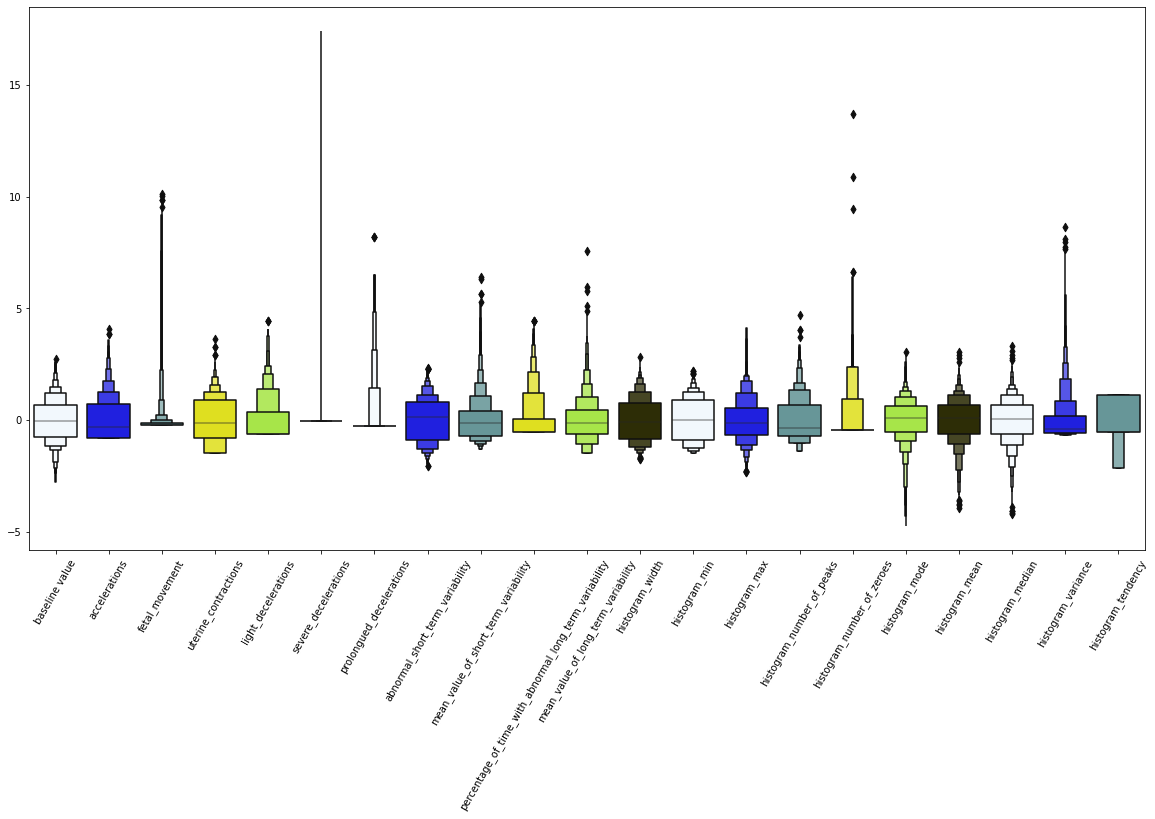

In [31]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = dataset_X_escalado,palette = colores)
plt.xticks(rotation=60)
plt.show()

Ahora podemos ver que todos los atributos se escalado correctamente y los rangos de los atributos son igualitarios, aunque hay valores que se dispersan.
Los valores que se disparan pueden ser producidos por un error de introducción o por un error humano, de este modo no los quitaremos para no perder información.

Una ver analizado los datos  y procesado los datos, se va ha proceder a realizar en entrenamiento.

Primero observare el accuracy de distintos algoritmos, he decidido utilizar:
-Regresion logística.
-Arbol de decisiones.
-Gradiente.
-Random Forest.
-KNN.
-SVC.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X_escalado, dataset_Y,test_size=0.20, random_state=25)

In [40]:

pipeline_regresion_logistica = Pipeline([('lr_classifier',LogisticRegression())])

pipeline_arbol_decisiones = Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_gradiente = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

pipeline_arbol_aleatorio = Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

pipelines = [pipeline_regresion_logistica, pipeline_arbol_decisiones, pipeline_gradiente, pipeline_arbol_aleatorio, pipeline_knn, pipeline_svc]
pipe_dict = {0: 'Regresion logistica', 1: 'Arbol decisiones', 2: 'Gradiente', 3:'Arbol random', 4: 'KNN', 5: 'SVC'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Regresion logistica: 0.897638 
Arbol decisiones: 0.922394 
Gradiente: 0.945298 
Arbol random: 0.940024 
KNN: 0.894699 
SVC: 0.913533 


Da un warning del algoritmo de Gradient Boost, no obstante no afecta al resultado.
Tras utilizar varios algoritmos podemos ver que que el algoritmo Gradient Boost es el que tiene un valor de accuracy mas alto.
Seriá posible observar el entrenamiento con todos los algoritmos pero he tomado la decisión de utilizar solo el que tiene el valor mas alto, esto es debido a que al final el resultado seria el mismo.

In [43]:
gradiente = GradientBoostingClassifier()
modelo = gradiente.fit(X_train, y_train)
print(f"Gradient Boosting Classifier Score: {round(modelo.score(X_test, y_test), 2)}")

prediccion = modelo.predict(X_test)

Gradient Boosting Classifier Score: 0.96


Una vez empezado el entrenamiento vemos que con Gradiente obtenemos un porcentaje de acierto del 96%.

In [44]:
scores = cross_val_score(gradiente, X_train, y_train, cv = 8, n_jobs = 2, scoring = "accuracy")

print(f"CV scores para el modelo de Gradient Boosting Classifier :\n{scores}")
print(f"CV Mean score: {round(scores.mean(), 2)}")

CV scores para el modelo de Gradient Boosting Classifier :
[0.96713615 0.93896714 0.92488263 0.94366197 0.97641509 0.95754717
 0.93396226 0.95754717]
CV Mean score: 0.95


Realizo un validación para comprobar el resultado anterior, se puede observar que el varametro de valores es próximo al obtenido y la media es muy cercano con un 95%.

Establecemos los parametros del GridSearchCV, los valores mas utilizados son los utilizados a continuacion.

In [57]:
parametros = {"loss": ["deviance"],
              "learning_rate": [0.25, 0.5, 0.75, 1], 
              "n_estimators": [200, 350, 500, 750],
              "max_depth": [3, 6, 8]
              }

In [58]:
GridSearchCV_gradiente = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=parametros, 
                                cv=2,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [59]:
GridSearchCV_gradiente.fit(X_train, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.5, 0.75, 1],
                         'loss': ['deviance'], 'max_depth': [3, 6, 8],
                         'n_estimators': [200, 350, 500, 750]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [60]:
mejor = GridSearchCV_gradiente.best_params_
print(f"el mejor parametro es:\n{mejor}")

el mejor parametro es:
{'learning_rate': 0.75, 'loss': 'deviance', 'max_depth': 8, 'n_estimators': 500}


Tras utilizar varias combinaciones podemos ver que el mejor valor de aprendizaje es un valor de 0,75, teniendo en cuenta los utilizados; con un estimadoer de 500.

Es hora de realizar un test.

In [62]:
gradiente = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=0.1, loss="deviance", 
                                  max_depth=8, max_features="log2", min_samples_leaf=0.3, 
                                  min_samples_split=0.75, n_estimators=500, random_state=25)

gradiente_mod = gradiente.fit(X_train, y_train)
pred_gbcl = gradiente_mod.predict(X_test)

score_train = gradiente_mod.score(X_train, y_train)
score_test = gradiente_mod.score(X_test, y_test)

print(f"training set = {round(score_train, 3)}")
print(f"testing set = {round(score_test, 3)}")

training set = 0.907
testing set = 0.897


Tras realizar un entrenamiento y testeo vemos que obtenemos valores muy próximos el uno al otro, de este modo podemos suponer que funciona correctamente.

In [64]:
pred = pipeline_gradiente.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f" Testing Score es {accuracy}")
print(classification_report(y_test, pred))

 Testing Score es 0.9553990610328639
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       324
         2.0       0.91      0.82      0.86        60
         3.0       0.93      0.95      0.94        42

    accuracy                           0.96       426
   macro avg       0.93      0.92      0.92       426
weighted avg       0.95      0.96      0.95       426



Se obtiene un accuracy de 95,54% , el cual es muy próximo al valor de accuracy obtenido anteriormente.
Si miramos el reporte de la classificación podemos ver que hay alrededor de un 95% de posibilidades de acertar y un 96% de posibilidades de que el resultado sea correcto.
De este modo vemos que la possibilidad de acertar de forma correcta es del 95%.

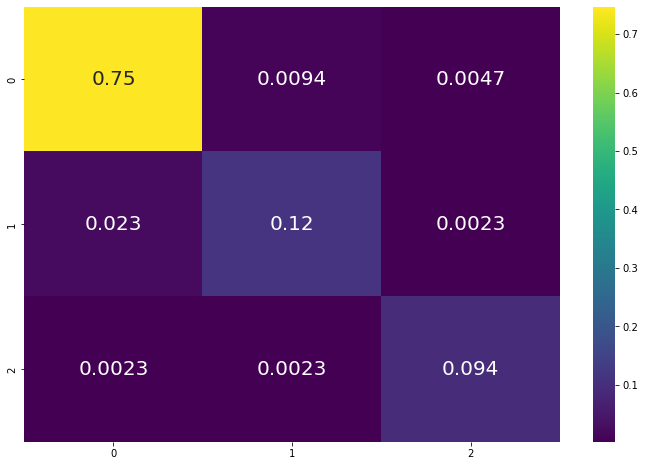

In [65]:
plt.subplots(figsize=(12,8))
matriz = confusion_matrix(y_test, pred)
sns.heatmap(matriz/np.sum(matriz), cmap='viridis',annot = True, annot_kws = {'size':20})
plt.show()

Si observamos la matriz de confusión podemos observar lo siguiente:
TP = 0,75
FN = 0,0141
FP = 0,0253
TN = 0,2186

#conclusiones

He podido observar que para esta base de datos el mejor algoritmo dentro de los elegidos ha sido GradientBoostingClassifier.

Teniendo en cuenta los valores obtenido y el algoritmo utilizado podemos ver que se puede obtener un resultado acertado en la mayoria de veces, de este modo es posible bajar la mortalidad infantil y las muertes durante el parto si se toman las decisiones correctas.

Tras obserbar varios ejemplos he podido observar que el procedimiento sigue la misma estructura de tratado de datos, así como las misma elecciones de entrenamiento.